# Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
food = pd.read_csv('datasets/original data/food.csv')
nutrient = pd.read_csv('datasets/original data/nutrient.csv')
food_nutrient = pd.read_csv('datasets/original data/food_nutrient.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import math
import statistics
import scipy.stats

## Food dataset

In [ ]:
food.head()

,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20541 entries, 0 to 20540
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fdc_id            20541 non-null  int64  
 1   data_type         20541 non-null  object 
 2   description       20541 non-null  object 
 3   food_category_id  20519 non-null  float64
 4   publication_date  20541 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 802.5+ KB


In [ ]:
f'unique food items: {pd.unique(food.iloc[:, 2]).size}'

'unique food items: 11335'

In [ ]:
f'unique food category items: {pd.unique(food.iloc[:, 3]).size}'

'unique food category items: 18'

In [ ]:
f'unique food type items: {pd.unique(food.iloc[:, 1]).size}'

'unique food type items: 5'

In [ ]:
food.shape

(20541, 5)

In [ ]:
food.isnull().sum()

fdc_id               0
data_type            0
description          0
food_category_id    22
publication_date     0
dtype: int64

## Nutrients dataset

In [ ]:
nutrient.head()

,id,name,unit_name,nutrient_nbr,rank
0,1002,Nitrogen,G,202.0,500.0
1,1003,Protein,G,203.0,600.0
2,1004,Total lipid (fat),G,204.0,800.0
3,1005,"Carbohydrate, by difference",G,205.0,1110.0
4,1007,Ash,G,207.0,1000.0


In [ ]:
nutrient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            237 non-null    int64  
 1   name          237 non-null    object 
 2   unit_name     237 non-null    object 
 3   nutrient_nbr  237 non-null    float64
 4   rank          236 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.4+ KB


In [ ]:
f'unique nutrient units: {pd.unique(nutrient.iloc[:, 2]).size}'

'unique nutrient units: 8'

In [ ]:
f'number of unique nutrient names {pd.unique(nutrient.iloc[:, 1]).size}'

'number of unique nutrient names 236'

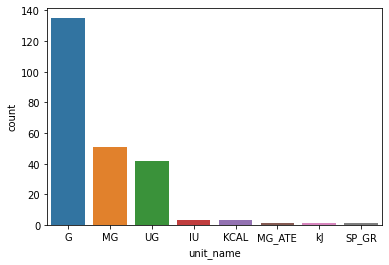

In [ ]:
sns.countplot(x='unit_name', data=nutrient, order=nutrient['unit_name'].value_counts().index)

In [ ]:
nutrient.shape

(237, 5)

In [ ]:
nutrient.isnull().sum()

id              0
name            0
unit_name       0
nutrient_nbr    0
rank            1
dtype: int64

## Food_nutrient dataset

In [ ]:
food_nutrient.head()

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acqured
0,2201847,319877,1051,56.30,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2201845,319877,1002,1.28,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2201846,319877,1004,19.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2201844,319877,1007,1.98,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2201852,319878,1091,188.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
food_nutrient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97985 entries, 0 to 97984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                97985 non-null  int64  
 1   fdc_id            97985 non-null  int64  
 2   nutrient_id       97985 non-null  int64  
 3   amount            97985 non-null  float64
 4   data_points       95870 non-null  float64
 5   derivation_id     97976 non-null  float64
 6   min               9018 non-null   float64
 7   max               9018 non-null   float64
 8   median            9620 non-null   float64
 9   footnote          3 non-null      object 
 10  min_year_acqured  24037 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.2+ MB


In [ ]:
f'number of unique nutrients {pd.unique(food_nutrient.iloc[:, 2]).size}'

'number of unique nutrients 198'

In [ ]:
food_nutrient.shape

(97985, 11)

In [ ]:
food_nutrient.isnull().sum()

id                      0
fdc_id                  0
nutrient_id             0
amount                  0
data_points          2115
derivation_id           9
min                 88967
max                 88967
median              88365
footnote            97982
min_year_acqured    73948
dtype: int64

In [ ]:
min_global = [
              food_nutrient['min'].mean(),
              food_nutrient['min'].median(),
              np.nanvar(food_nutrient['min'], ddof=1),
              np.nanstd(food_nutrient['min'], ddof=1),
              food_nutrient['min'].skew()
]
min_global

[42.6964445553338,
 0.07,
 349403.39262743486,
 591.1035379926557,
 55.88813410704303]

In [ ]:
max_global = [
              food_nutrient['max'].mean(),
              food_nutrient['max'].median(),
              np.nanvar(food_nutrient['max'], ddof=1),
              np.nanstd(food_nutrient['max'], ddof=1),
              food_nutrient['max'].skew()
]
max_global

[64.92866954978925,
 0.163,
 493061.59892616293,
 702.1834510483446,
 45.450445607302036]

In [ ]:
median_global = [
              food_nutrient['median'].mean(),
              food_nutrient['median'].median(),
              np.nanvar(food_nutrient['median'], ddof=1),
              np.nanstd(food_nutrient['median'], ddof=1),
              food_nutrient['median'].skew()
]
median_global

[50.00942110187098,
 0.1335,
 379820.21891017904,
 616.2955613260402,
 52.24417530154258]

In [ ]:
amount_stats = [
              food_nutrient['amount'].mean(),
              food_nutrient['amount'].median(),
              np.nanvar(food_nutrient['amount'], ddof=1),
              np.nanstd(food_nutrient['amount'], ddof=1),
              food_nutrient['amount'].skew()
]
amount_stats

[82.26828746236708,
 0.27,
 499691.4526654872,
 706.888571604809,
 44.82865432728749]

In [ ]:
df_statistics = pd.DataFrame([min_global, max_global, median_global, amount_stats], index=['min_stats', 'max_stats', 'median_stats', 'amount_stats'])
df_statistics.columns= ['mean', 'median', 'variance', 'standard deviation', 'skewness']
df_statistics

,mean,median,variance,standard deviation,skewness
min_stats,42.696445,0.0700,349403.392627,591.103538,55.888134
max_stats,64.928670,0.1630,493061.598926,702.183451,45.450446
median_stats,50.009421,0.1335,379820.218910,616.295561,52.244175
amount_stats,82.268287,0.2700,499691.452665,706.888572,44.828654


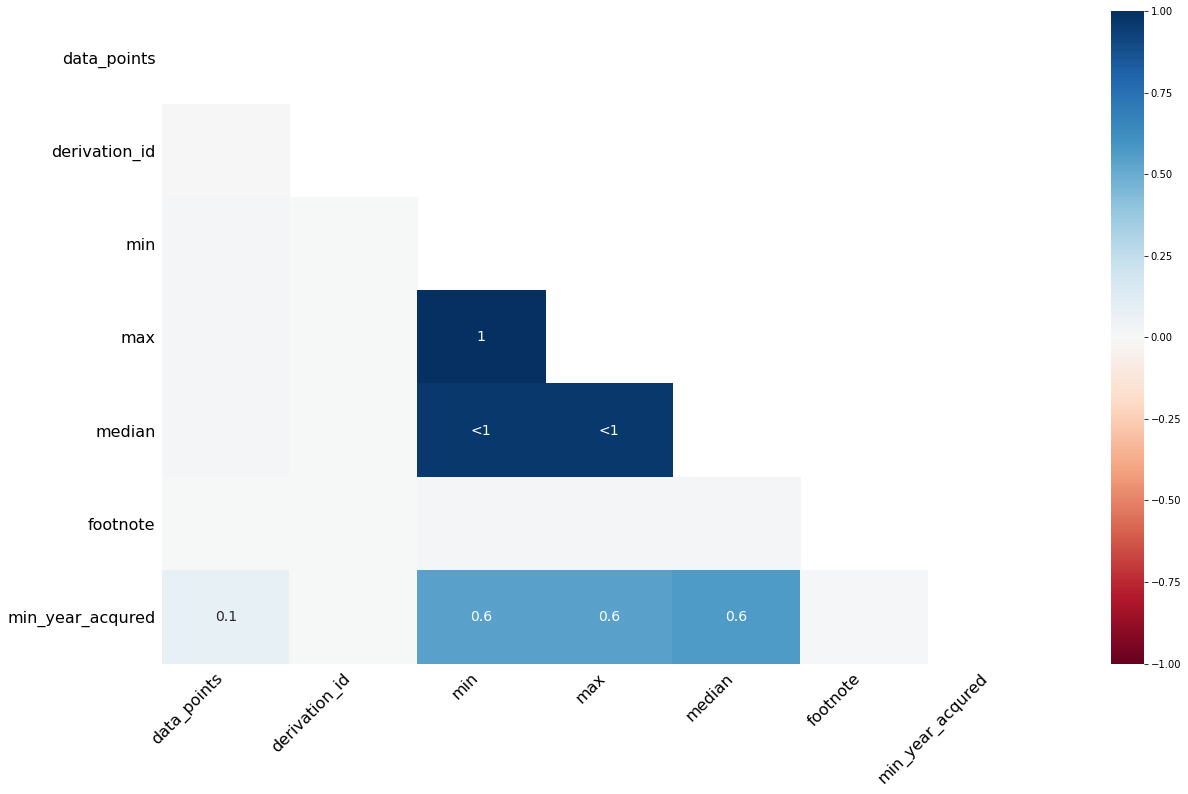

In [ ]:
import missingno as msno

msno.heatmap(food_nutrient)

In [ ]:
food_nutrient.corr()

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,min_year_acqured
id,1.000000,0.999115,0.141785,-0.037319,0.053033,0.034094,0.001136,0.000624,0.001704,-0.022966
fdc_id,0.999115,1.000000,0.137211,-0.036464,0.052716,0.034110,0.001240,0.000751,0.001818,-0.017768
nutrient_id,0.141785,0.137211,1.000000,-0.059495,-0.009716,-0.041086,-0.038449,-0.048460,-0.042695,-0.092016
amount,-0.037319,-0.036464,-0.059495,1.000000,0.006867,0.016905,0.992110,0.992774,0.999677,0.100002
data_points,0.053033,0.052716,-0.009716,0.006867,1.000000,NaN,0.034938,0.066266,0.051324,-0.002464
derivation_id,0.034094,0.034110,-0.041086,0.016905,NaN,1.000000,-0.006540,-0.008737,-0.007165,-0.012617
min,0.001136,0.001240,-0.038449,0.992110,0.034938,-0.006540,1.000000,0.971658,0.991092,0.029068
max,0.000624,0.000751,-0.048460,0.992774,0.066266,-0.008737,0.971658,1.000000,0.992318,0.025650
median,0.001704,0.001818,-0.042695,0.999677,0.051324,-0.007165,0.991092,0.992318,1.000000,0.026215
min_year_acqured,-0.022966,-0.017768,-0.092016,0.100002,-0.002464,-0.012617,0.029068,0.025650,0.026215,1.000000


In [ ]:
food_nutrient.min()

id                  2201844.0
fdc_id               319877.0
nutrient_id            1002.0
amount                    0.0
data_points               1.0
derivation_id             1.0
min                       0.0
max                       0.0
median                    0.0
min_year_acqured       1999.0
dtype: float64

In [ ]:
food_nutrient.max()

id                  13338388.0
fdc_id               1105897.0
nutrient_id             2033.0
amount                 40700.0
data_points              252.0
derivation_id             49.0
min                    37200.0
max                    40700.0
median                 38500.0
min_year_acqured        2020.0
dtype: float64

In [ ]:
food_nutrient.mean()

id                  4.175190e+06
fdc_id              4.576955e+05
nutrient_id         1.215308e+03
amount              8.226829e+01
data_points         2.071941e+00
derivation_id       1.330693e+00
min                 4.269644e+01
max                 6.492867e+01
median              5.000942e+01
min_year_acqured    2.014637e+03
dtype: float64

In [ ]:
food_nutrient.median()

id                  2.266410e+06
fdc_id              3.337430e+05
nutrient_id         1.165000e+03
amount              2.700000e-01
data_points         1.000000e+00
derivation_id       1.000000e+00
min                 7.000000e-02
max                 1.630000e-01
median              1.335000e-01
min_year_acqured    2.016000e+03
dtype: float64

In [ ]:
food_nutrient.std()

id                  3.186691e+06
fdc_id              2.137755e+05
nutrient_id         2.171785e+02
amount              7.068886e+02
data_points         7.785736e+00
derivation_id       3.694268e+00
min                 5.911035e+02
max                 7.021835e+02
median              6.162956e+02
min_year_acqured    4.075786e+00
dtype: float64

In [ ]:
food_nutrient.quantile([.1, .25, .5, .75], axis = 0) 

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,min_year_acqured
0.10,2227120.4,323007.0,1011.0,0.000,1.0,1.0,0.0000,0.000,0.0000,2009.0
0.25,2241850.0,326733.0,1091.0,0.003,1.0,1.0,0.0000,0.003,0.0010,2016.0
0.50,2266410.0,333743.0,1165.0,0.270,1.0,1.0,0.0700,0.163,0.1335,2016.0
0.75,8516744.0,746800.0,1292.0,6.840,1.0,1.0,1.9375,3.470,3.0000,2016.0


In [ ]:
select_data = food_nutrient[['amount', 'min', 'max', 'median']]
select_data

,amount,min,max,median
0,56.300,NaN,NaN,NaN
1,1.280,NaN,NaN,NaN
2,19.000,NaN,NaN,NaN
3,1.980,NaN,NaN,NaN
4,188.000,NaN,NaN,NaN
...,...,...,...,...
97980,0.000,0.000,0.000,0.000
97981,0.091,0.080,0.120,0.085
97982,0.000,0.000,0.000,0.000
97983,15.700,NaN,NaN,NaN


In [ ]:
ds = food_nutrient.groupby(['nutrient_id', 'amount'])['median'].mean().reset_index()
ds.columns = ['nutrient_id', 'amount', 'average_median']
ds

,nutrient_id,amount,average_median
0,1002,0.00,0.000000
1,1002,0.01,NaN
2,1002,0.02,0.023333
3,1002,0.03,0.030000
4,1002,0.04,0.040000
...,...,...,...
26013,2033,6.32,NaN
26014,2033,23.80,NaN
26015,2033,24.20,NaN
26016,2033,24.30,24.300000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa866e64a90>,
      dtype=object)

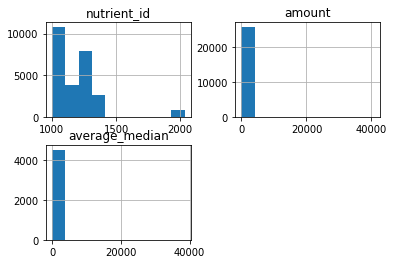

In [ ]:
ds.hist()

In [ ]:
min_by_nutrients_and_amount_avg = food_nutrient.groupby(['nutrient_id', 'amount'])['min'].mean().reset_index()
min_by_nutrients_and_amount_avg.columns = ['nutrient_id', 'amount', 'average_min']
min_by_nutrients_and_amount_avg.mean()

nutrient_id    1193.572027
amount          128.790487
average_min      52.952402
dtype: float64

In [ ]:
min_by_nutrients_and_amount_avg.median()

nutrient_id    1166.000
amount            1.860
average_min       0.428
dtype: float64

In [ ]:
min_by_nutrients_and_amount_avg.std()

nutrient_id     180.172752
amount         1147.319941
average_min     620.822097
dtype: float64

In [ ]:
min_by_nutrients_and_amount_avg.var()

nutrient_id    3.246222e+04
amount         1.316343e+06
average_min    3.854201e+05
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa866c94890>,
      dtype=object)

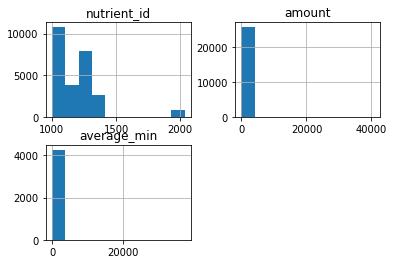

In [ ]:
min_by_nutrients_and_amount_avg.hist()

In [ ]:
max_by_nutrients_and_amount_avg = food_nutrient.groupby(['nutrient_id', 'amount'])['max'].mean().reset_index()
max_by_nutrients_and_amount_avg.columns = ['nutrient_id', 'amount', 'average_max']
max_by_nutrients_and_amount_avg.mean()

nutrient_id    1193.572027
amount          128.790487
average_max      81.877854
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa866b2d310>,
      dtype=object)

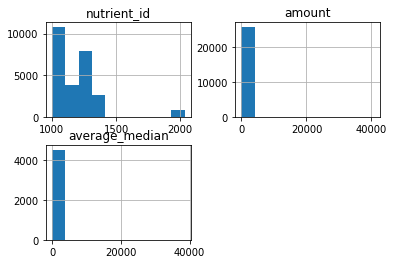

In [ ]:
median_by_nutrients_and_amount_avg = food_nutrient.groupby(['nutrient_id', 'amount'])['median'].mean().reset_index()
median_by_nutrients_and_amount_avg.columns = ['nutrient_id', 'amount', 'average_median']
median_by_nutrients_and_amount_avg.hist()

In [ ]:
median_by_nutrients_and_amount_avg.mean()

nutrient_id       1193.572027
amount             128.790487
average_median      62.451340
dtype: float64

In [ ]:
median_by_nutrients_and_amount_avg.median()

nutrient_id       1166.0000
amount               1.8600
average_median       0.6725
dtype: float64

In [ ]:
median_by_nutrients_and_amount_avg.std()

nutrient_id        180.172752
amount            1147.319941
average_median     655.230297
dtype: float64

In [ ]:
median_by_nutrients_and_amount_avg.var()

nutrient_id       3.246222e+04
amount            1.316343e+06
average_median    4.293267e+05
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8669b8810>,
      dtype=object)

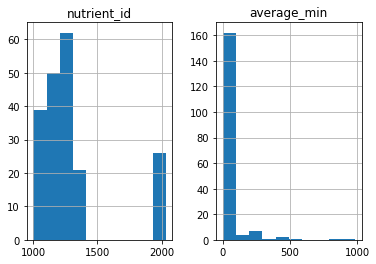

In [ ]:
min_by_nutrients_avg = food_nutrient.groupby(['nutrient_id'])['min'].mean().reset_index()
min_by_nutrients_avg.columns = ['nutrient_id', 'average_min']
min_by_nutrients_avg.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa866892110>,
      dtype=object)

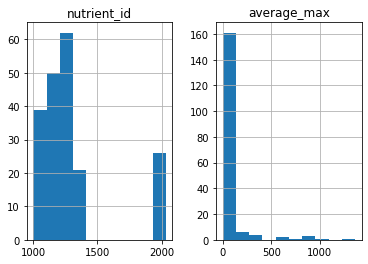

In [ ]:
max_by_nutrients_avg = food_nutrient.groupby(['nutrient_id'])['max'].mean().reset_index()
max_by_nutrients_avg.columns = ['nutrient_id', 'average_max']
max_by_nutrients_avg.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa866752c50>,
      dtype=object)

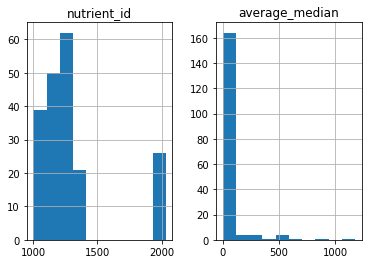

In [ ]:
median_by_nutrients_avg = food_nutrient.groupby(['nutrient_id'])['median'].mean().reset_index()
median_by_nutrients_avg.columns = ['nutrient_id', 'average_median']
median_by_nutrients_avg.hist()

In [ ]:
median_by_food_and_nutrient = food_nutrient.groupby(['nutrient_id', 'fdc_id'])['median'].mean().reset_index()
median_by_food_and_nutrient.columns = ['nutrient_id', 'food_id', 'avg_median']
median_by_food_and_nutrient

,nutrient_id,food_id,avg_median
0,1002,319877,NaN
1,1002,319882,NaN
2,1002,319892,NaN
3,1002,319899,NaN
4,1002,319908,NaN
...,...,...,...
97980,2033,1105168,NaN
97981,2033,1105190,NaN
97982,2033,1105230,NaN
97983,2033,1105302,NaN
